In [1]:
import wandb
import pandas as pd
import seaborn as sns

In [4]:
api = wandb.Api(timeout=100)
runs = api.runs(path="cardiors/RecordGraphs", filters={"display_name": "220425_buffer_ablation"})

In [5]:
run_df = pd.DataFrame(
    [
        dict(
            run_id=r.id,
            buffer_years=eval(r.config["_content"]["datamodule"])["buffer_years"],
            val_mean_cindex=r.summary["valid/mean_CIndex_max"],
        )
        for r in runs
    ]
)

<AxesSubplot:xlabel='buffer_years', ylabel='val_mean_cindex'>

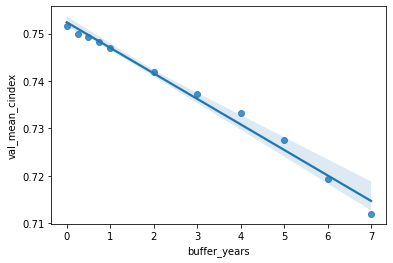

In [6]:
sns.regplot(x="buffer_years", y="val_mean_cindex", data=run_df)